In [2]:
!pip install imblearn

     |████████████████████████████████| 206 kB 18.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from imblearn.pipeline import make_pipeline

from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

%matplotlib inline

import sys
sys.path.append("..")
from CustomTransformer import CustomTransformer

from pprint import pprint
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline

In [34]:
import os 
os.chdir("../")
bucket = 'aws-project-politomaster-sagemaker-data' 

In [35]:
prep_train_path = os.path.join('s3://', bucket, 'preprocess/prep_train.csv')
prep_train = pd.read_csv(prep_train_path)
print("Prep_train dataset has: {} rows and {} columns".format(prep_train.shape[0], prep_train.shape[1]))
prep_train.head()

Prep_train dataset has: 43170 rows and 10 columns


,carat_class,cut,color,clarity,depth,table,price,x,y,z
0,0,4,5,1,61.746807,54.834605,651.357414,5.350743,4.352193,2.667488
1,0,3,5,2,60.811398,60.300733,651.357414,5.350743,4.352193,2.667488
2,0,1,5,4,59.799569,60.300733,651.357414,5.350743,4.352193,2.667488
3,0,3,1,3,62.110048,57.770527,651.357414,5.350743,4.352193,2.667488
4,0,1,0,1,63.367713,58.202601,651.357414,5.350743,4.352193,2.899670


In [36]:
prep_test_path = os.path.join('s3://', bucket, 'preprocess/prep_test.csv')
prep_test = pd.read_csv(prep_test_path)
print("Prep_test dataset has: {} rows and {} columns".format(prep_test.shape[0], prep_test.shape[1]))
prep_train.head()

Prep_test dataset has: 10770 rows and 10 columns


,carat_class,cut,color,clarity,depth,table,price,x,y,z
0,0,4,5,1,61.746807,54.834605,651.357414,5.350743,4.352193,2.667488
1,0,3,5,2,60.811398,60.300733,651.357414,5.350743,4.352193,2.667488
2,0,1,5,4,59.799569,60.300733,651.357414,5.350743,4.352193,2.667488
3,0,3,1,3,62.110048,57.770527,651.357414,5.350743,4.352193,2.667488
4,0,1,0,1,63.367713,58.202601,651.357414,5.350743,4.352193,2.899670


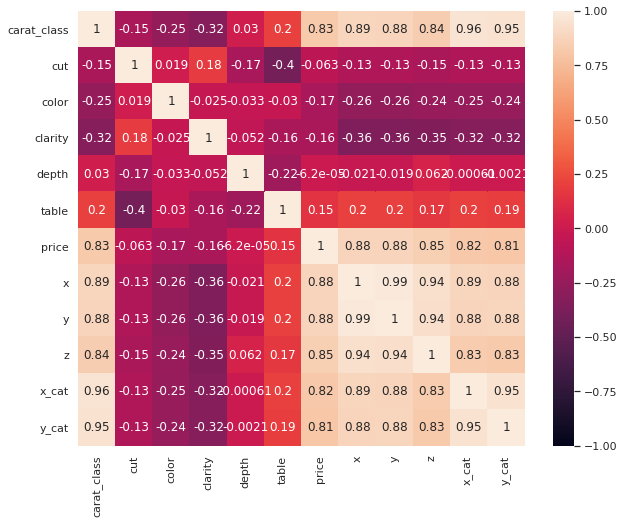

In [37]:
custom_transf = CustomTransformer()
new_train = custom_transf.transform(prep_train)

sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots(1, 1)
sns.heatmap(new_train.corr(), vmin = -1, vmax= 1 , annot = True)
#plt.savefig("images/trainingCorr.png")
plt.show()

In [38]:
seed = 0

target = prep_train['carat_class']
data = prep_train.drop(labels = ['carat_class'],axis = 1)
sample_train, sample_val, label_train, label_val = \
    train_test_split(data, target, test_size=0.3, random_state=seed)

In [39]:
classifiers = [LogisticRegression(random_state = seed), GaussianNB(), 
               DecisionTreeClassifier(random_state = seed),
               SGDClassifier(random_state = seed), KNeighborsClassifier(), 
               SVC(gamma='auto',kernel='linear', C = 1.0, random_state = seed),
               SVC(gamma='auto',kernel='rbf', C = 1.0, random_state = seed)
              ]

clf_names = ['Logistic Regression', 'Naive Bayes', 'Decision tree', 'SGD', 'KNN Classifier',
             'SVM linear', 'SVM rdf']

sampling_techs = [EditedNearestNeighbours(), RandomOverSampler(), SMOTE(random_state=seed)]
sampling_names = ['ENN-Undersample', 'ROS-Oversample','SMOTE']

Classifier:  Logistic Regression
Sampling method:  ENN-Undersample
Time required:  32.82304406166077
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.97      0.93      0.95       564

    accuracy                           0.99     12951
   macro avg       0.98      0.97      0.97     12951
weighted avg       0.99      0.99      0.99     12951



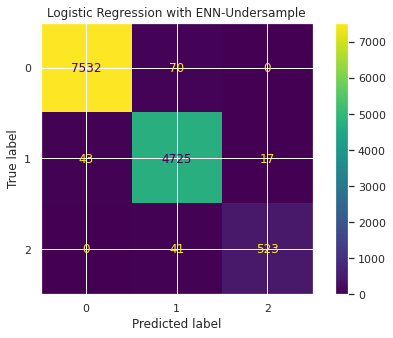

Classifier:  Logistic Regression
Sampling method:  ROS-Oversample
Time required:  16.867425441741943
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.98      0.97      0.98      4785
           2       0.83      0.97      0.90       564

    accuracy                           0.98     12951
   macro avg       0.94      0.98      0.96     12951
weighted avg       0.99      0.98      0.98     12951



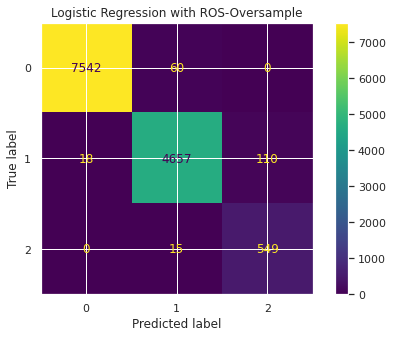

Classifier:  Logistic Regression
Sampling method:  SMOTE
Time required:  4.411458253860474
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7602
           1       0.99      0.98      0.98      4785
           2       0.85      0.97      0.91       564

    accuracy                           0.99     12951
   macro avg       0.94      0.98      0.96     12951
weighted avg       0.99      0.99      0.99     12951



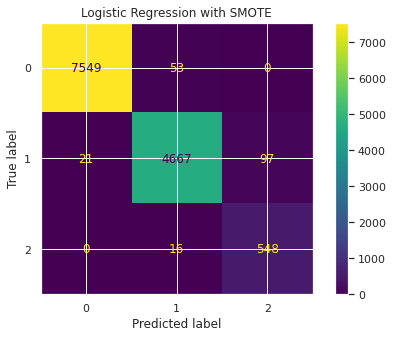

Classifier:  Naive Bayes
Sampling method:  ENN-Undersample
Time required:  1.4950294494628906
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.97      0.99      0.98      4785
           2       0.97      0.89      0.93       564

    accuracy                           0.98     12951
   macro avg       0.98      0.96      0.97     12951
weighted avg       0.98      0.98      0.98     12951



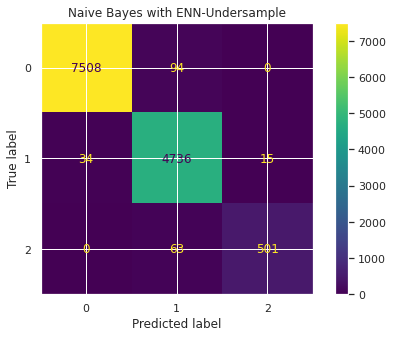

Classifier:  Naive Bayes
Sampling method:  ROS-Oversample
Time required:  0.26178812980651855
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.97      0.98      0.98      4785
           2       0.89      0.95      0.92       564

    accuracy                           0.98     12951
   macro avg       0.95      0.97      0.96     12951
weighted avg       0.98      0.98      0.98     12951



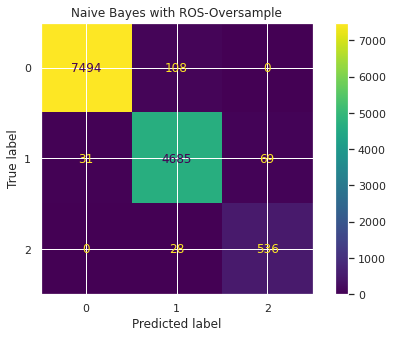

Classifier:  Naive Bayes
Sampling method:  SMOTE
Time required:  0.7170028686523438
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.97      0.98      0.98      4785
           2       0.89      0.94      0.92       564

    accuracy                           0.98     12951
   macro avg       0.95      0.97      0.96     12951
weighted avg       0.98      0.98      0.98     12951



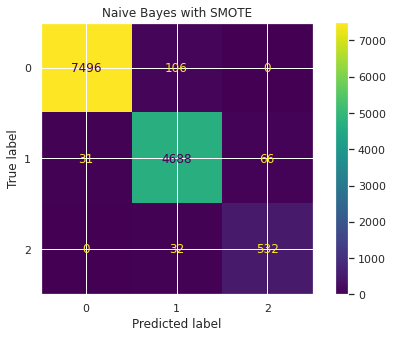

Classifier:  Decision tree
Sampling method:  ENN-Undersample
Time required:  1.7014703750610352
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.94      0.96      0.95       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



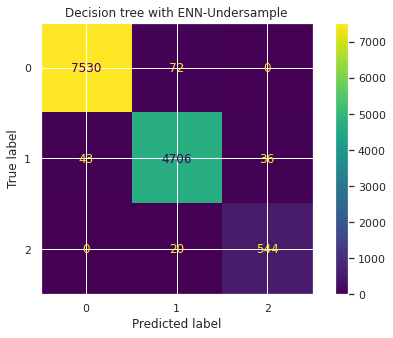

Classifier:  Decision tree
Sampling method:  ROS-Oversample
Time required:  0.8523156642913818
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.95      0.94      0.94       564

    accuracy                           0.99     12951
   macro avg       0.97      0.97      0.97     12951
weighted avg       0.99      0.99      0.99     12951



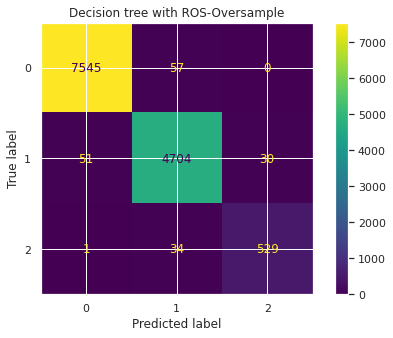

Classifier:  Decision tree
Sampling method:  SMOTE
Time required:  1.86777663230896
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.90      0.95      0.92       564

    accuracy                           0.98     12951
   macro avg       0.96      0.97      0.96     12951
weighted avg       0.99      0.98      0.98     12951



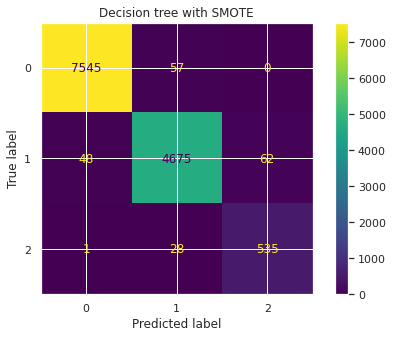

Classifier:  SGD
Sampling method:  ENN-Undersample
Time required:  1.6275715827941895
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.94      0.96      0.95       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



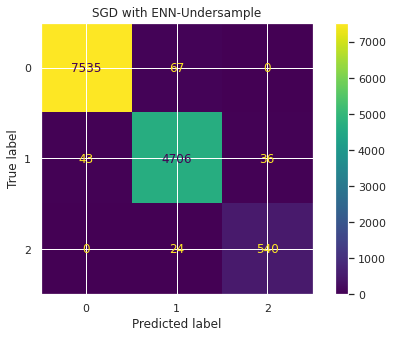

Classifier:  SGD
Sampling method:  ROS-Oversample
Time required:  0.8224918842315674
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7602
           1       0.99      0.96      0.97      4785
           2       0.79      0.98      0.87       564

    accuracy                           0.98     12951
   macro avg       0.92      0.98      0.95     12951
weighted avg       0.98      0.98      0.98     12951



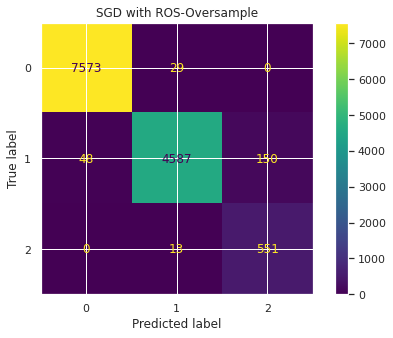

Classifier:  SGD
Sampling method:  SMOTE
Time required:  1.427553653717041
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7602
           1       0.99      0.96      0.98      4785
           2       0.83      0.97      0.89       564

    accuracy                           0.98     12951
   macro avg       0.94      0.98      0.96     12951
weighted avg       0.99      0.98      0.98     12951



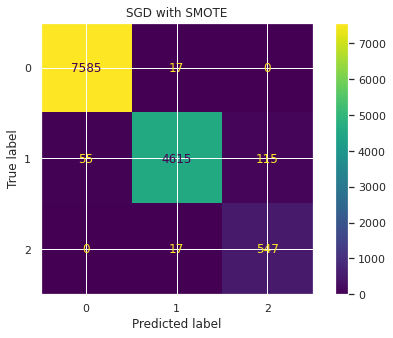

Classifier:  KNN Classifier
Sampling method:  ENN-Undersample
Time required:  2.785092353820801
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.97      0.99      0.98      4785
           2       0.97      0.88      0.92       564

    accuracy                           0.98     12951
   macro avg       0.98      0.95      0.96     12951
weighted avg       0.98      0.98      0.98     12951



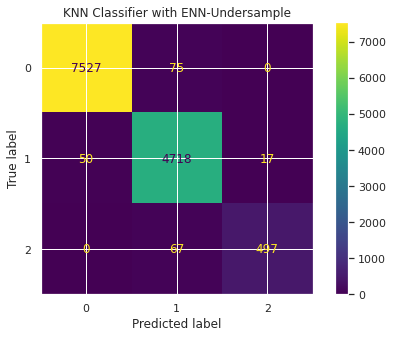

Classifier:  KNN Classifier
Sampling method:  ROS-Oversample
Time required:  1.5512619018554688
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.97      0.98      0.98      4785
           2       0.90      0.93      0.91       564

    accuracy                           0.98     12951
   macro avg       0.96      0.96      0.96     12951
weighted avg       0.98      0.98      0.98     12951



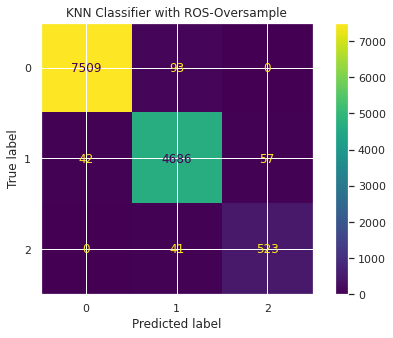

Classifier:  KNN Classifier
Sampling method:  SMOTE
Time required:  3.759826183319092
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.97      0.98      0.97      4785
           2       0.88      0.94      0.91       564

    accuracy                           0.98     12951
   macro avg       0.95      0.97      0.96     12951
weighted avg       0.98      0.98      0.98     12951



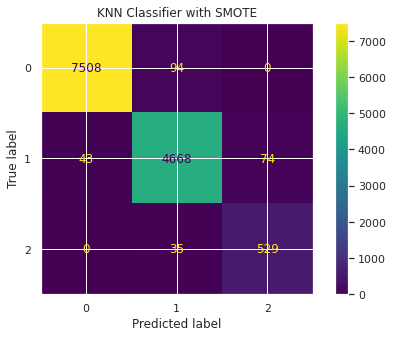

Classifier:  SVM linear
Sampling method:  ENN-Undersample
Time required:  12.70822811126709
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.97      0.93      0.95       564

    accuracy                           0.99     12951
   macro avg       0.98      0.97      0.98     12951
weighted avg       0.99      0.99      0.99     12951



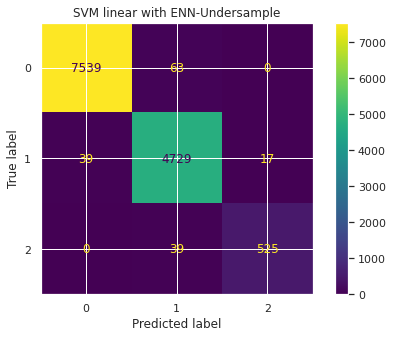

Classifier:  SVM linear
Sampling method:  ROS-Oversample
Time required:  95.99627733230591
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7602
           1       0.99      0.98      0.98      4785
           2       0.88      0.97      0.92       564

    accuracy                           0.99     12951
   macro avg       0.95      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



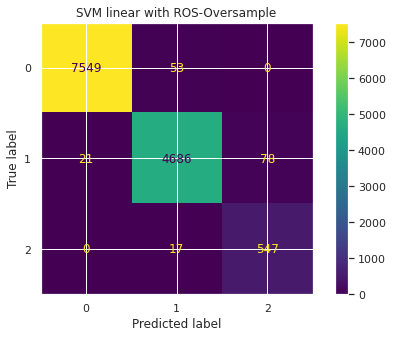

Classifier:  SVM linear
Sampling method:  SMOTE
Time required:  69.47781276702881
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7602
           1       0.99      0.98      0.98      4785
           2       0.88      0.96      0.92       564

    accuracy                           0.99     12951
   macro avg       0.96      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



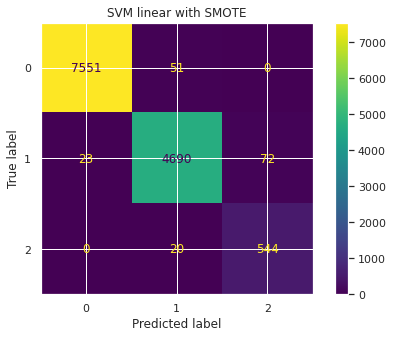

Classifier:  SVM rdf
Sampling method:  ENN-Undersample
Time required:  23.931233644485474
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.97      0.93      0.95       564

    accuracy                           0.99     12951
   macro avg       0.98      0.97      0.97     12951
weighted avg       0.99      0.99      0.99     12951



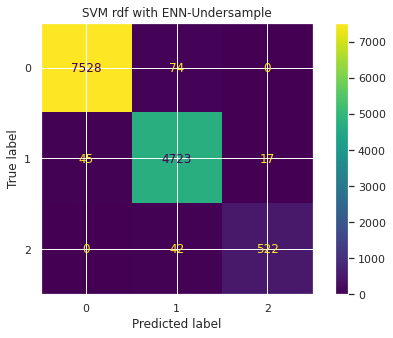

Classifier:  SVM rdf
Sampling method:  ROS-Oversample
Time required:  34.99636697769165
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.91      0.97      0.94       564

    accuracy                           0.99     12951
   macro avg       0.96      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



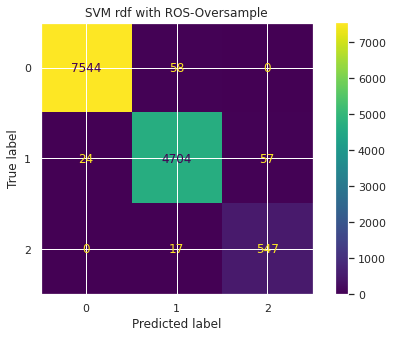

Classifier:  SVM rdf
Sampling method:  SMOTE
Time required:  50.32831406593323
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.91      0.97      0.94       564

    accuracy                           0.99     12951
   macro avg       0.96      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



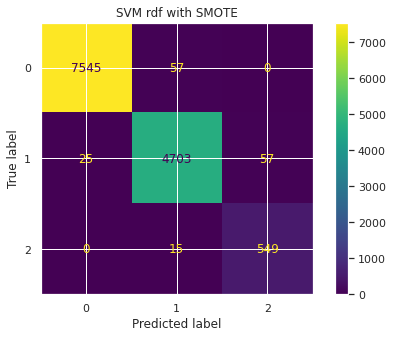



Best accuracy score: 0.9881090263300131
Best classifier: SVM rdf
Best sampling method: SMOTE


In [40]:
best_score = 0
best_clf = ''
best_samp = ''
for clf, clf_name in zip(classifiers,clf_names):
    for samp, samp_name in zip(sampling_techs,sampling_names):
        custom_transf = CustomTransformer()
        std_scale = StandardScaler()
        pca = PCA(n_components=8)
        
        t0 = time.time()
        model = make_pipeline(custom_transf,std_scale,pca,samp,clf)
        model.fit(sample_train, label_train)
        pred = model.predict(sample_val)
        t1 = time.time()
        report = classification_report(label_val,pred, output_dict = True)
        score = report['accuracy']
        if score > best_score:
            best_score = score
            best_clf = clf_name
            best_samp = samp_name
        print('Classifier: ',clf_name)
        print('Sampling method: ',samp_name)
        print('Time required: ',t1-t0)
        print(classification_report(label_val,pred))
        img = sns.set(rc={'figure.figsize':(8,5)})
        plot_confusion_matrix(model, sample_val, label_val) 
        plt.title(clf_name + ' with '+samp_name)
        plt.show()
        
print('\n')
print('Best accuracy score:',best_score)
print('Best classifier:',best_clf)
print('Best sampling method:', best_samp)

# Gridsearch

In [23]:
custom_transf = CustomTransformer()
std_scale = StandardScaler()
pca = PCA(n_components=8)

## Gridsearch on Logistic Regression with ENN

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time required:  83.39639735221863
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.97      0.93      0.95       564

    accuracy                           0.99     12951
   macro avg       0.98      0.97      0.97     12951
weighted avg       0.99      0.99      0.99     12951



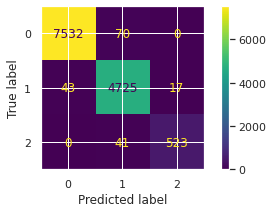

{'clf__C': 1.0, 'samp__n_neighbors': 3}


In [26]:
pipeline = Pipeline([
    ('samp', EditedNearestNeighbours()),
    ('clf', LogisticRegression( random_state = seed)),
])

parameters = [
    {
        'samp__n_neighbors' : (3,10,100),
        'clf__C': [0.01,0.1,1.]
    }
]

t0 = time.time()
grid_search = GridSearchCV(pipeline, parameters)

model = make_pipeline(custom_transf,std_scale, pca, grid_search)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

pprint(model['gridsearchcv'].best_params_)

## Gridsearch on Decision tree with ENN and ROS

Time required:  221.68975257873535
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.95      0.96      0.96       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



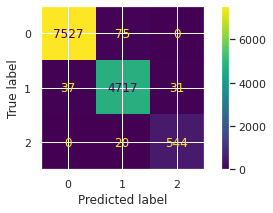

{'clf__min_samples_leaf': 5,
 'clf__min_samples_split': 2,
 'samp__n_neighbors': 3}


In [28]:
pipeline = Pipeline([
    ('samp', EditedNearestNeighbours()),
    ('clf', DecisionTreeClassifier( random_state = seed)),
])

parameters = [
    {
        'samp__n_neighbors' : (3,10,100),
        'clf__min_samples_split': [2,5,10],
        'clf__min_samples_leaf': [1,3,5]
    }, {
        'samp' : (RandomOverSampler(random_state = seed),),
        'clf__min_samples_split': [2,5,10],
        'clf__min_samples_leaf': [1,3,5]
    }
]

t0 = time.time()
grid_search = GridSearchCV(pipeline, parameters)

model = make_pipeline(custom_transf,std_scale, pca, grid_search)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

pprint(model['gridsearchcv'].best_params_)

## Gridsearch on SGD with ENN

Time required:  89.24209403991699
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.94      0.96      0.95       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



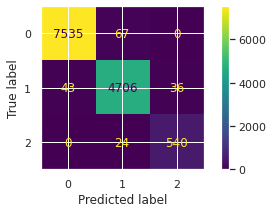

{'clf__alpha': 0.0001, 'samp__n_neighbors': 3}


In [29]:
pipeline = Pipeline([
    ('samp', EditedNearestNeighbours()),
    ('clf', SGDClassifier( random_state = seed)),
])

parameters = [
    {
        'samp__n_neighbors' : (3,10,100),
        'clf__alpha': [0.00001, 0.0001, 0.001, 0.01]
    }
]

t0 = time.time()
grid_search = GridSearchCV(pipeline, parameters)

model = make_pipeline(custom_transf,std_scale, pca, grid_search)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

pprint(model['gridsearchcv'].best_params_)

## Gridsearch on SVM linear/rdf with ENN

Time required:  375.1218650341034
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.97      0.93      0.95       564

    accuracy                           0.99     12951
   macro avg       0.98      0.97      0.98     12951
weighted avg       0.99      0.99      0.99     12951



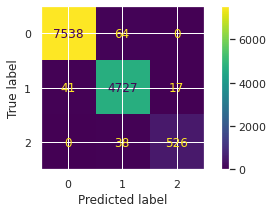

{'clf__C': 10, 'clf__kernel': 'linear', 'samp__n_neighbors': 3}


In [30]:
pipeline = Pipeline([
    ('samp', EditedNearestNeighbours()),
    ('clf', SVC( random_state = seed)),
])

parameters = [
    {
        'samp__n_neighbors' : (3,10,100),
        'clf__kernel': ['linear','rbf'],
        'clf__C': [0.01,0.1,1,10,100]
    }
]

t0 = time.time()
grid_search = GridSearchCV(pipeline, parameters)

model = make_pipeline(custom_transf,std_scale, pca, grid_search)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

pprint(model['gridsearchcv'].best_params_)

# Test the model

Time required:  10.179993152618408
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.94      0.96      0.95       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



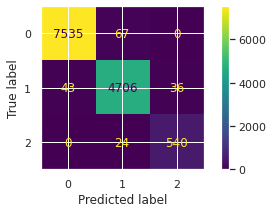

In [41]:
enn = EditedNearestNeighbours(n_neighbors = 3)
clf = SGDClassifier(random_state = seed, alpha = 0.0001)

t0 = time.time()
model = make_pipeline(custom_transf,std_scale, pca, enn, clf)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

In [63]:
test_target = prep_test['carat_class']
test_data = prep_test.drop(labels = ['carat_class'],axis = 1)

t0 = time.time()
model = make_pipeline(custom_transf,std_scale, pca, enn, clf)
model.fit(data, target)
pred = model.predict(test_data)
t1 = time.time()
print('Time required: ',t1-t0)

Time required:  15.392956495285034


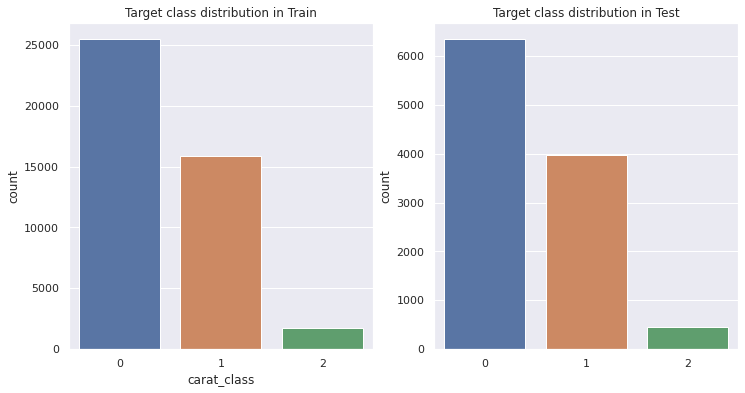

In [64]:
fig,ax = plt.subplots(1,2, figsize = (12,6))
sns.countplot(x= target , ax = ax[0]).set_title("Target class distribution in Train")
sns.countplot(x= pred , ax = ax[1]).set_title("Target class distribution in Test")
plt.show()